<a href="https://colab.research.google.com/github/jorgelum/EQ/blob/main/Raspagem_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

Atualmente a obtenção de dados é vital em qualquer atividade da vida humana. Na engenharia química os dados são muito importantes para modelar processos e prever comportamento de substâncias. Uma boa fonte de dados é o webbook de química da National Intitute of Standards and Technology (NIST).

## Estratégia

A raspagem (Web Scraping) é uma forma simples de obtenção de dados disponibilizados na internet (não tão seguro quanto uma API) e utilizando bibliotecas simples no python quero obter dados de propriedades termodinâmicas das substâncias.

## Bibliotecas

In [1]:
import pandas as pd # tratamento de dados
import requests # requisição
from bs4 import BeautifulSoup # rapagem
import re # tratamento de strings

## Raspagem

Primeiro vamos pegar quais as substâncias disponíveis

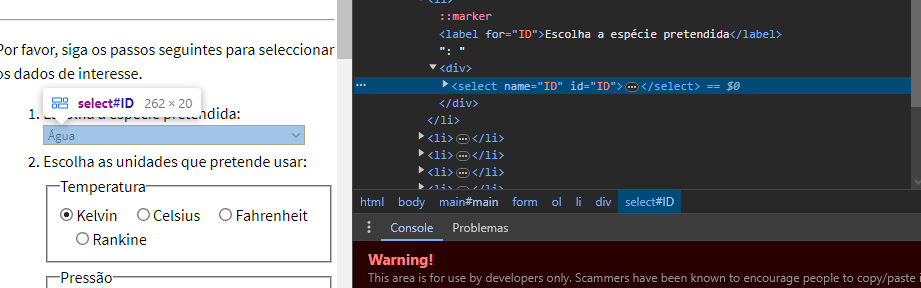

In [2]:
# Ler os elementos disponíveis na página
link = "https://webbook.nist.gov/chemistry/fluid/"
requisicao = requests.get(link)
print(requisicao.text)

<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<title>Thermophysical Properties of Fluid Systems</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="viewport" content="width = device-width" />

<link rel="stylesheet" type="text/css"
 href="../style/webbook.css"
 title="Default Chemistry WebBook style"
 media="screen, print" />

<link rel="shortcut icon"
 href="../../favicon.ico"
 type="image/x-icon" />

<link rel="apple-touch-icon"
 sizes="76x76"
 href="../img/touch-icon-76x76.png"
 type="image/png" />
<link rel="icon"
 sizes="76x76"
 href="../img/touch-icon-76x76.png"
 type="image/png" />

<link rel="icon"
 sizes="120x120"
 href="../img/touch-icon-120x120.png"
 type="image/png" />
<link rel="apple-touch-icon"
 sizes="120x120"
 href="../img/touch-icon-120x120.png"
 type="image/png" />

<link rel="icon"
 sizes="152x152"
 href="../img/touch-icon-152x152.png"
 type="image/png" />
<link rel="apple-touch-icon

In [3]:
#Buscando um elemento em específico
site = BeautifulSoup(requisicao.text,'html.parser')
site.find('title')

<title>Thermophysical Properties of Fluid Systems</title>

In [4]:
#Pegando a aba de seleções de substâncias
sample_string = str(site.find("select")) # Converte em uma string
sample_string

'<select id="ID" name="ID">\n<option value="C7732185">Water</option>\n<option value="C7727379">Nitrogen</option>\n<option value="C1333740">Hydrogen</option>\n<option value="B5000001">Parahydrogen</option>\n<option value="B5000007">Orthohydrogen</option>\n<option value="C7782390">Deuterium</option>\n<option value="C7782447">Oxygen</option>\n<option value="C7782414">Fluorine</option>\n<option value="C630080">Carbon monoxide</option>\n<option value="C124389">Carbon dioxide</option>\n<option value="C10024972">Dinitrogen monoxide</option>\n<option value="C7789200">Deuterium oxide</option>\n<option value="C67561">Methanol</option>\n<option value="C74828">Methane</option>\n<option value="C74840">Ethane</option>\n<option value="C74851">Ethene</option>\n<option value="C74986">Propane</option>\n<option value="C115071">Propene</option>\n<option value="C74997">Propyne</option>\n<option value="C75194">Cyclopropane</option>\n<option value="C106978">Butane</option>\n<option value="C75285">Isobutane</

Finalmente listando todas as substâncias

In [5]:
# Encontrar padrões que começam com "C" e capturar os valores
pattern = re.compile(r'value="(C\d+)">(\w+)</option>')
matches = pattern.findall(sample_string)

# Criar um DataFrame a partir dos padrões encontrados
# O código será importante posteriormente
data = pd.DataFrame(matches, columns=['Código', 'Substância'])
data

,Código,Substância
0,C7732185,Water
1,C7727379,Nitrogen
2,C1333740,Hydrogen
3,C7782390,Deuterium
4,C7782447,Oxygen
5,C7782414,Fluorine
6,C67561,Methanol
7,C74828,Methane
8,C74840,Ethane
9,C74851,Ethene


Agora podemos construir uma função em que completamos o link final da tabela, para simplicar eu selecionei somente 4 parâmetro (Pressão, substância, menor e maior temperatura) e optei por fixar as outras, como as unidades e a temperatura incremental. Os dados são de propriedades **isobáricas**.  

In [6]:
def raspagem(P, substancia, Tinic = 293.15,Tfinal = 600):
  # Converter os termos em strings
  P = str(P)
  Tinic = str(Tinic)
  Tfinal = str(Tfinal)

  # Selecionar as substâncias
  link = "https://webbook.nist.gov/chemistry/fluid/"
  requisicao = requests.get(link)
  sample_string = str(site.find("select"))

  pattern = re.compile(r'value="(C\d+)">(\w+)</option>')
  matches = pattern.findall(sample_string)

  data = pd.DataFrame(matches, columns=['Código', 'Substância'])
  subs = data[data['Substância']==substancia].iloc[0,0]

  # Montar o link final
  link_complete = f"https://webbook.nist.gov/cgi/fluid.cgi?P={P}.5&TLow={Tinic}&THigh={Tfinal}&TInc=5&Digits=5&ID={subs}&Action=Load&Type=IsoBar&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF"

  # Transformando em um dataframe
  tabela = pd.read_html(link_complete)[0]
  return tabela

In [7]:
df = raspagem(1.0,'Heptane',298.15,600)
df.head()

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,298.15,1.0,6.7912,0.14725,-17.696,-17.549,-52.907,177.83,224.93,1139.2,-0.41269,394.03,0.12264,liquid
1,303.15,1.0,6.7490,0.14817,-16.567,-16.419,-49.151,179.60,226.84,1117.7,-0.40491,373.48,0.12114,liquid
2,308.15,1.0,6.7065,0.14911,-15.429,-15.280,-45.424,181.40,228.78,1096.3,-0.39691,354.49,0.11965,liquid
3,313.15,1.0,6.6639,0.15006,-14.281,-14.131,-41.726,183.22,230.76,1075.1,-0.38867,336.90,0.11817,liquid
4,318.15,1.0,6.6209,0.15104,-13.124,-12.973,-38.055,185.07,232.77,1053.9,-0.38018,320.58,0.11669,liquid


In [8]:
df.to_csv("dadosTermo.csv") # exportando em formato csv